<div align="center">
    <h1>Credit Card Fraud Detection</h1>
</div>

<img src="https://cdn.sketchbubble.com/pub/media/catalog/product/optimized1/4/a/4af2dada5403d9ea7b1520cfbe202b1ac5f94308633c7defb1702e39e5f510a8/credit-card-fraud-detection-slide1.png" alt="Sample Image" width="900"/>

### Objective:

Develop a credit card fraud detection system that compares the effectiveness of various under-sampling and over-sampling techniques when paired with different machine learning algorithms. The primary goals include:

1. **Explore and preprocess the credit card transaction dataset.**
2. **Implement multiple under-sampling and over-sampling techniques to handle class imbalance.**
3. **Experiment with diverse classification algorithms, such as Random Forest, Logistic Regression, and Support Vector Machines.**
4. **Evaluate the models using metrics like accuracy, precision, recall, F1 score, and AUC-ROC.**
5. **Identify the most effective combination of sampling technique and algorithm for optimal fraud detection performance.**

### Deliverables:

- Comparative analysis of under-sampling and over-sampling methods.
- Model performance metrics for each combination of technique and algorithm.
- Recommendations for the most suitable approach for credit card fraud detection based on the experiment results.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Handling Class-Imbalanced Data

- **Class Imbalance:**
  - The dataset under consideration exhibits class imbalance, where one class significantly outnumbers the other(s). This is a common challenge in machine learning.

### Accuracy Challenge

- **High Accuracy Pitfall:**
  - In the case of class-imbalanced data, achieving high accuracy can be misleading. A model might achieve high accuracy by simply predicting the majority class, neglecting the minority class.

### Dealing with Class Imbalance

- **Challenges:**
  - The primary challenge is addressing the imbalance to ensure fair representation of all classes in the model training process.

- **Techniques:**
  - Different techniques are available to handle class imbalance effectively.

### Strategies for Dealing with Class Imbalance

1. **Resampling Techniques:**
   - **Oversampling:** Increase the representation of the minority class by duplicating or generating synthetic instances.
   - **Undersampling:** Decrease the representation of the majority class by removing instances.

2. **Algorithmic Approaches:**
   - Choose algorithms that inherently handle imbalanced datasets or adjust algorithms to give more importance to the minority class.

3. **Evaluation Metrics:**
   - Use metrics like precision, recall, F1-score, and area under the ROC curve (AUC-ROC) instead of accuracy for better assessment.


*Remember:* In class-imbalanced scenarios, accuracy alone may not be a reliable indicator of model performance.


## Exploratory Data Analysis 

#### Features in dataset
* **Time**: The time elapsed between the current transaction and the first transaction in the dataset. It's often in seconds.
* **V1 to V28**: These are anonymized and transformed features resulting from a PCA (Principal Component Analysis) transformation. Due to privacy and security concerns, the original features have been transformed to these principal components.
* **Amount**: The transaction amount.
* **Class**: This is the target variable indicating whether a transaction is fraudulent (Class 1) or not (Class 0). This is typically the variable you're trying to predict.

In [8]:
columns = list(data.columns)
len(columns)

31

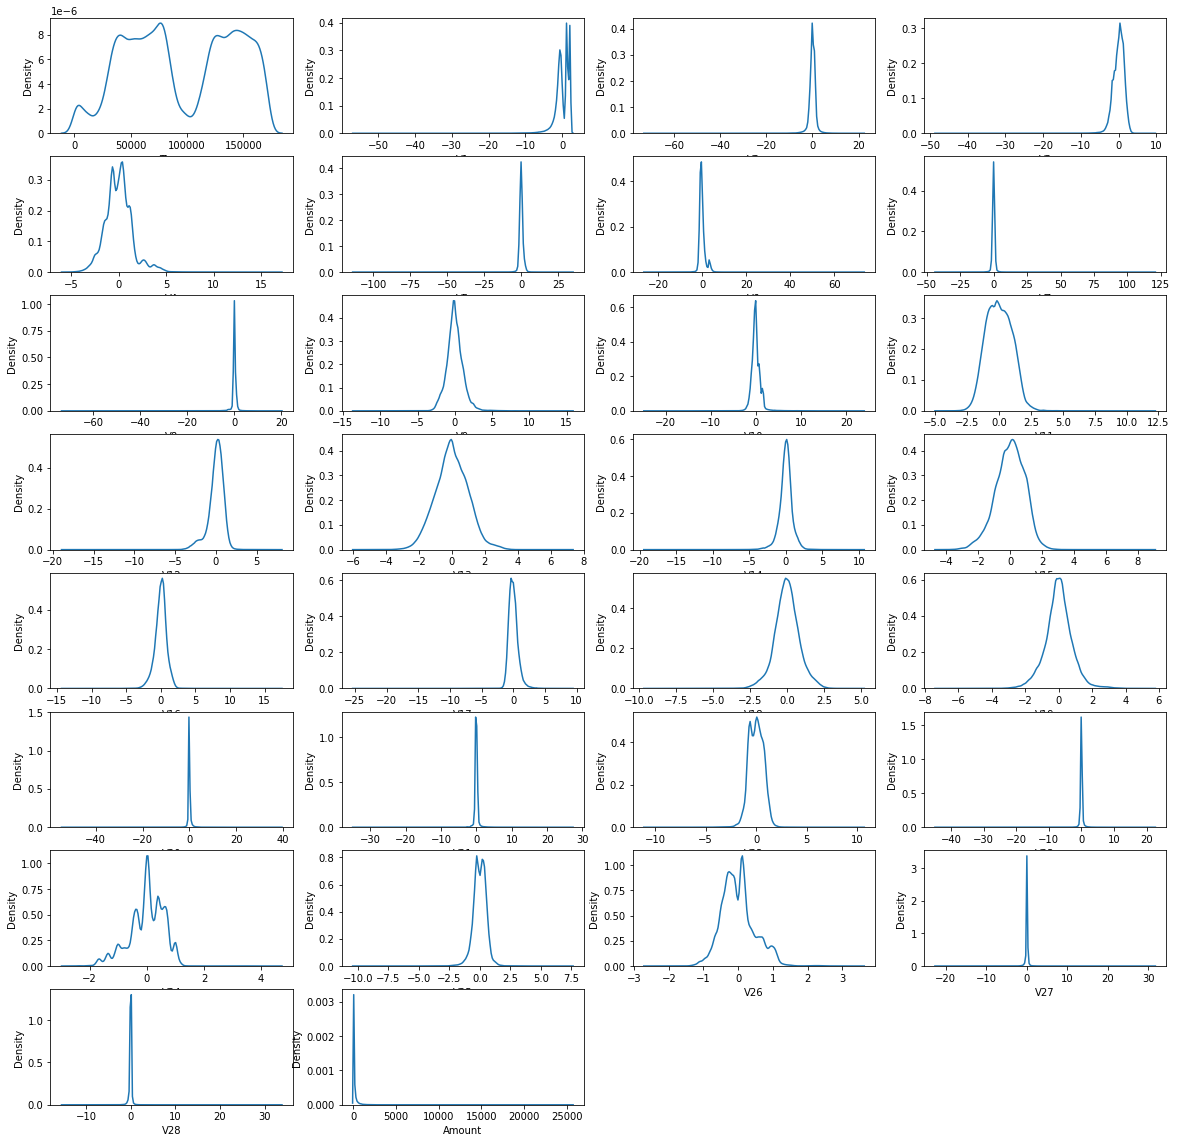

In [87]:
plt.figure(figsize=(20,20))
for i in range(1,31):
    plt.subplot(8,4,i)
    sns.distplot(data[columns[i-1]],hist=False)

<Axes: >

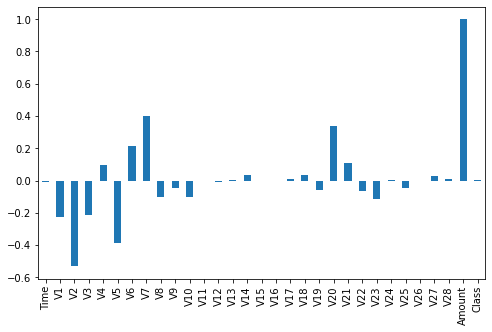

In [96]:
# correlation of features target variable
plt.figure(figsize=(8,5))
data.corrwith(data['Amount']).plot(kind='bar')

<Axes: >

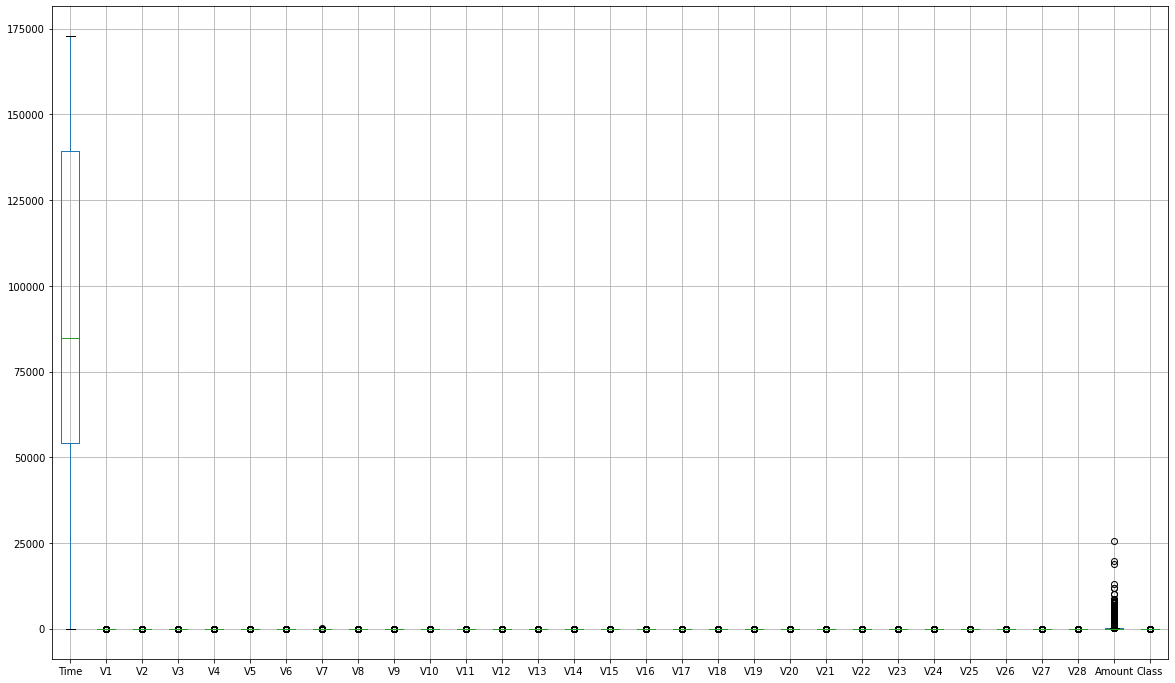

In [37]:
plt.figure(figsize=(20,12))
data.boxplot()

* The dataset have gone through scaling except for the Amount and Time column.
* Let us scae those columns so that dataset is on the same scale.


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss = StandardScaler()
data['Scaled_Time'] = ss.fit_transform(data['Time'].values.reshape(-1, 1))
data['Scaled_Amt'] = ss.fit_transform(data['Amount'].values.reshape(-1, 1))

In [11]:
data.drop(['Time','Amount'],axis=1,inplace=True)

<Axes: >

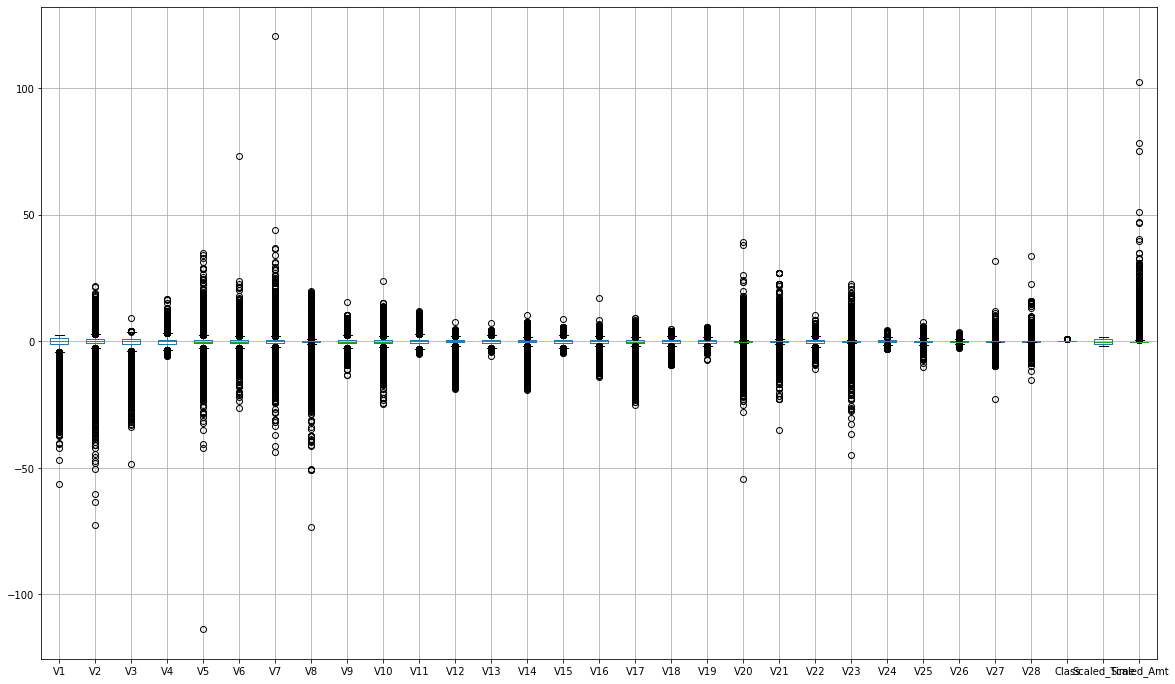

In [91]:
plt.figure(figsize=(20,12))
data.boxplot()

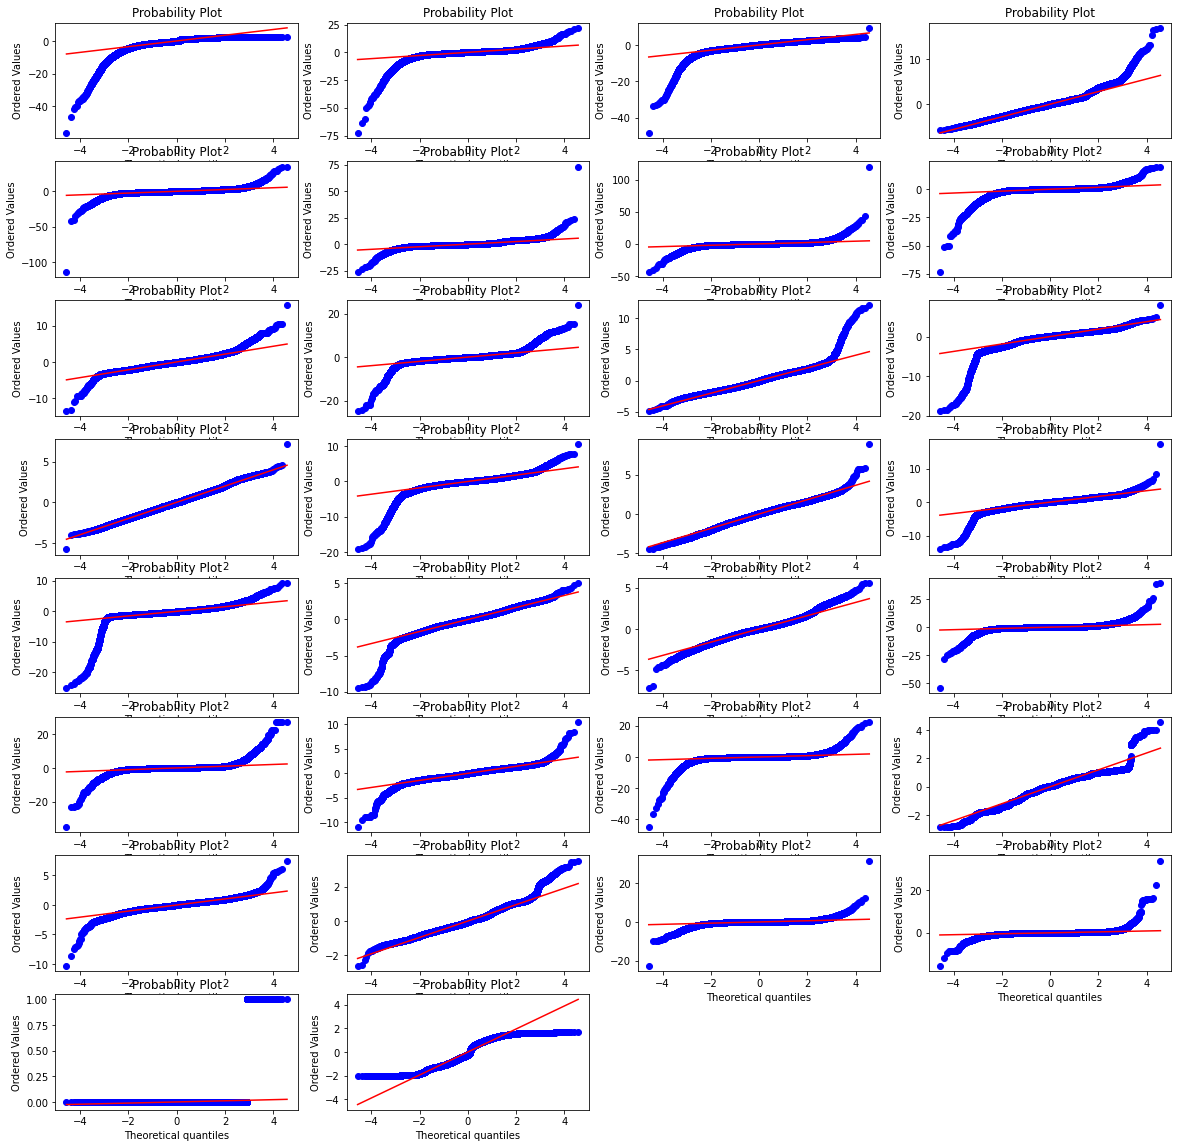

In [46]:
from scipy import stats
plt.figure(figsize=(20,20))
for i in range(1,31):
    plt.subplot(8,4,i)
    stats.probplot(data[columns[i-1]],dist='norm',plot=plt)

<Axes: >

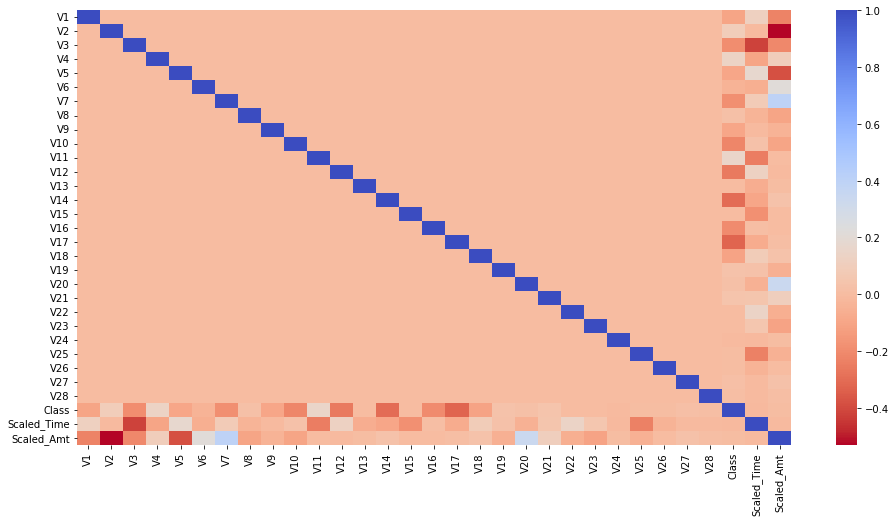

In [51]:
plt.figure(figsize=(16,8))
corr = data.corr()
sns.heatmap(corr,cmap='coolwarm_r')

<Axes: xlabel='Class'>

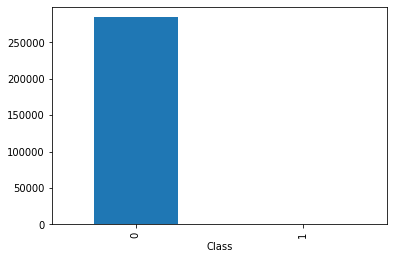

In [12]:
data['Class'].value_counts().plot(kind='bar')

## Approach

### 1. Data Splitting
- Split the dataset into training and testing sets.

### 2. Further Splitting for Validation
- Further split the training set into training and validation sets.

### 3. Resampling on Training Set
- Apply resampling techniques (Over Sampling, Under Sampling, or a combination like SMOTE and Tomek Links) exclusively on the training set.
- Techniques like SMOTE generate synthetic instances, while others may undersample the majority class to address the class imbalance.

### 4. Model Training
- Train a machine learning model on the resampled training set.
- For example, use a RandomForestClassifier.

### 5. Validation Set Evaluation
- Evaluate the model on the validation set to monitor its performance during training.
- Calculate and print the F1 score as the primary evaluation metric.

### 6. Test Set Evaluation
- Evaluate the trained model on the original, unmodified test set.
- Calculate and print the F1 score for the test set to assess the model's generalization to unseen data.

By following this approach, we aim to test different resampling methods to handle imbalanced data and compare their effectiveness for the specific problem of credit card fraud detection. The emphasis is on the F1 score as an evaluation metric to balance precision and recall in the classification task. Adjustments can be made based on the requirements and characteristics of the dataset.


In [13]:
X = data.drop("Class",axis=1)
y = data['Class']

### Splitting Dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Naming scheme to avoid overwriting 
X_train_original, X_test, y_train_original,y_test = train_test_split(X,y,test_size=0.3,stratify=data['Class'],random_state=101)

In [16]:
X_train_original.shape,y_train_original.shape

((199364, 30), (199364,))

In [17]:
X_test.shape,y_test.shape

((85443, 30), (85443,))

In [18]:
y_train_original.value_counts(normalize=True)

Class
0    0.998275
1    0.001725
Name: proportion, dtype: float64

In [19]:
y_train_original.value_counts()

Class
0    199020
1       344
Name: count, dtype: int64

In [20]:
y_test.value_counts(normalize=True)

Class
0    0.998268
1    0.001732
Name: proportion, dtype: float64

* Train and test sets have equal proportions of class 0 and class 1

## Under Sampling Techniques

In [102]:
y_train_original.value_counts()

Class
0    199020
1       344
Name: count, dtype: int64

<Axes: xlabel='Class'>

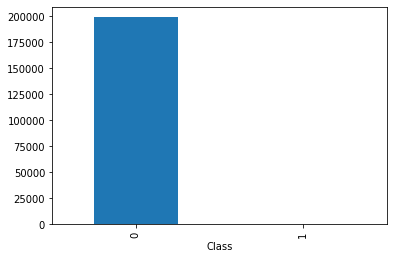

In [103]:
y_train_original.value_counts().plot(kind='bar')

* Class 0 is the majority of the class while 1 is minority

### 1. Random Under Sampling

In [104]:
from imblearn.under_sampling import RandomUnderSampler

In [105]:
# Create a RandomUnderSampler instance
random_undersampler = RandomUnderSampler(random_state=42)

# Apply random undersampling to the training set
X_resampled, y_resampled = random_undersampler.fit_resample(X_train_original, y_train_original)

In [106]:
X_resampled.shape, y_resampled.shape

((688, 30), (688,))

In [107]:
y_resampled.value_counts()

Class
0    344
1    344
Name: count, dtype: int64

In [29]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):

    results = {}

    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate F1 scores
    train_f1 = f1_score(y_train, train_pred)
    test_f1 = f1_score(y_test, test_pred)
    cv_f1_scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv)
    mean_cv_f1 = cv_f1_scores.mean()

    results['Training F1 Score'] = train_f1
    results['Test F1 Score'] = test_f1
    results['Cross-validated F1 Score (Training)'] = mean_cv_f1

    # Visualize F1 scores using a bar chart
    labels = list(results.keys())
    scores = list(results.values())

    plt.figure(figsize=(8, 5))
    plt.bar(labels, scores, color=['blue', 'green', 'orange'])
    plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for F1 score interpretation
    plt.title('F1 Scores Evaluation')
    plt.ylabel('F1 Score')
    plt.show()

    return results


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logr = LogisticRegression()

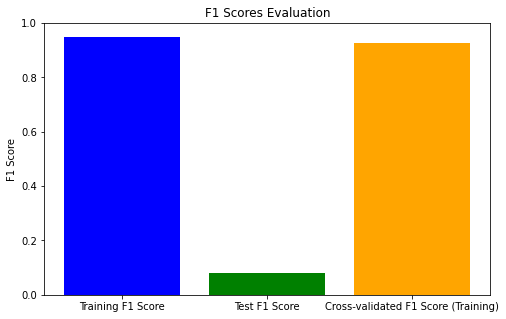

{'Training F1 Score': 0.9475262368815591,
 'Test F1 Score': 0.07883461868037704,
 'Cross-validated F1 Score (Training)': 0.9268294726832774}

In [111]:
evaluate_model(logr,X_resampled,y_resampled,X_test,y_test,cv=5)

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
def Auc_Roc(model):
    y_probabilities = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print("AUC-ROC Score:", roc_auc)


### 2. TomekLinks Under Sampling

* Tomek Links is an undersampling technique used to address class imbalance in machine learning datasets. It is a rule-based method that focuses on identifying and removing instances from the majority class that are close to instances in the minority class. The goal is to make the decision boundary between classes more distinct, potentially improving the performance of classifiers, particularly in scenarios where the class distribution is highly imbalanced.

In [22]:
from imblearn.under_sampling import TomekLinks

tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_train_original, y_train_original)

In [24]:
y_resampled.value_counts()

Class
0    198994
1       344
Name: count, dtype: int64

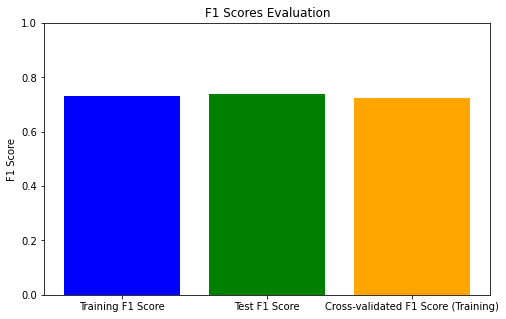

{'Training F1 Score': 0.7307032590051458,
 'Test F1 Score': 0.7401574803149605,
 'Cross-validated F1 Score (Training)': 0.7243803528896623}

In [30]:
evaluate_model(logr,X_resampled,y_resampled,X_test,y_test,cv=5)

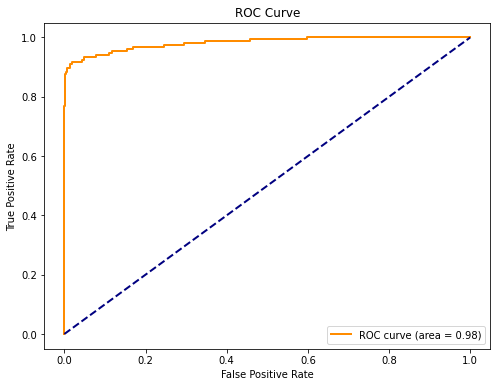

AUC-ROC Score: 0.9814320094172371


In [38]:
Auc_Roc(logr)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

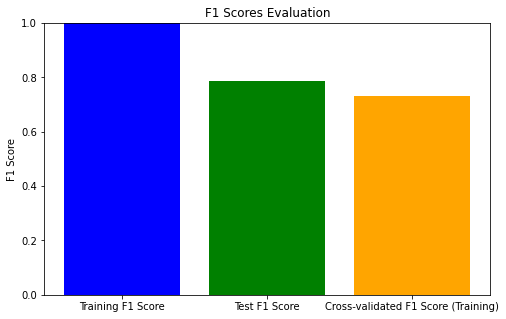

{'Training F1 Score': 1.0,
 'Test F1 Score': 0.7857142857142857,
 'Cross-validated F1 Score (Training)': 0.7317698264105587}

In [33]:
evaluate_model(dt,X_resampled,y_resampled,X_test,y_test,cv=5)

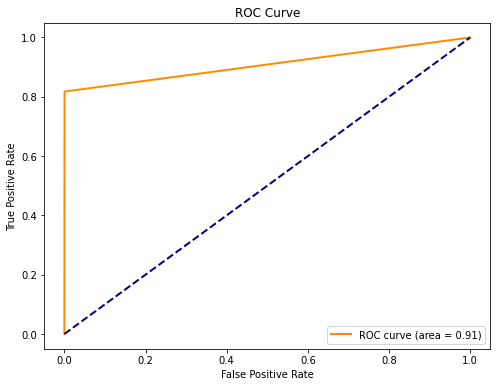

AUC-ROC Score: 0.9085551654591458


In [37]:
Auc_Roc(dt)

### 3. NearMiss Under Sampling

In [71]:
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
X_resampled, y_resampled = nearmiss.fit_resample(X_train_original, y_train_original)
y_resampled.value_counts()

Training F1 Score: 0.9646
Test F1 Score: 0.0078
Cross-validated F1 Score (Training): 0.9525


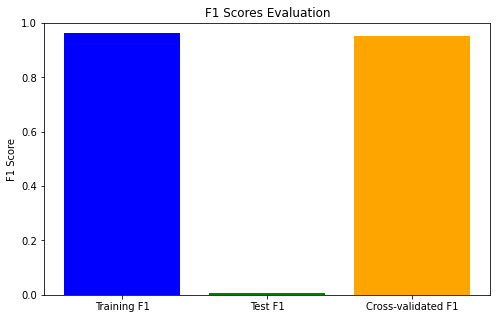

In [72]:
evaluate_model(logr,X_resampled,y_resampled,X_test,y_test,cv=5)

* We can conclude that model generalizes better with oversampling than undersampling. 

### 4. ClusterCentroids Under Sampling

In [74]:
from imblearn.under_sampling import ClusterCentroids
clustercentroid = ClusterCentroids()
X_resampled, y_resampled = clustercentroid.fit_resample(X_train_original, y_train_original)
y_resampled.value_counts()

Class
0    344
1    344
Name: count, dtype: int64

Training F1 Score: 0.9459
Test F1 Score: 0.0695
Cross-validated F1 Score (Training): 0.9321


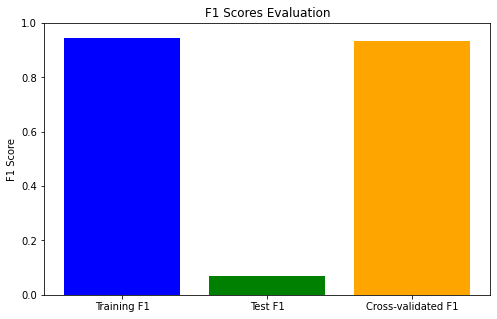

In [75]:
evaluate_model(logr,X_resampled,y_resampled,X_test,y_test,cv=5)

## Over Sampling Techniques

### 1. RandomSMOTE Over Sampling

In [40]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_original, y_train_original)

Training F1 Score: 0.9432
Test F1 Score: 0.1092
Cross-validated F1 Score (Training): 0.9431


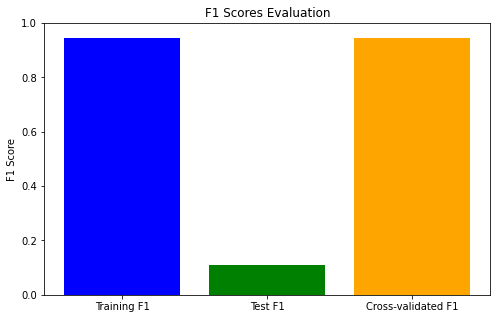

In [41]:
evaluate_model(logr,X_resampled,y_resampled,X_test,y_test,cv=5)

* The model here is overfitting on training data and is not able to generalize well for the test data. 

### 2. KMeans SMOTE Oversampling

In [39]:
from imblearn.over_sampling import KMeansSMOTE

In [40]:
Kmsmote = KMeansSMOTE(random_state=42,cluster_balance_threshold=0)
X_resampled, y_resampled = Kmsmote.fit_resample(X_train_original, y_train_original)

In [43]:
y_resampled.value_counts()

Class
1    199025
0    199020
Name: count, dtype: int64

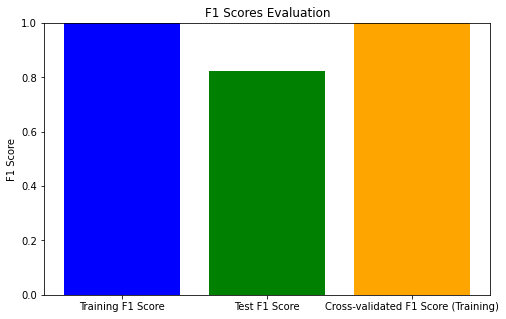

{'Training F1 Score': 0.9996960005225776,
 'Test F1 Score': 0.823529411764706,
 'Cross-validated F1 Score (Training)': 0.9995523361471307}

In [41]:
evaluate_model(logr,X_resampled,y_resampled,X_test,y_test,cv=5)

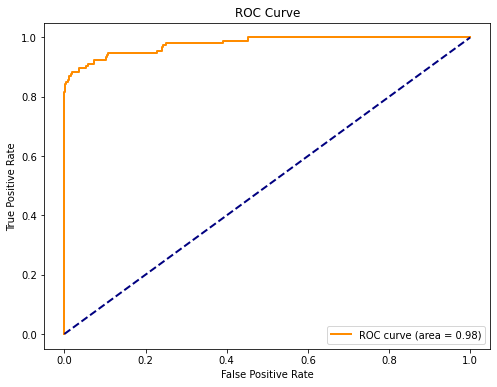

AUC-ROC Score: 0.9781589491478699


In [44]:
Auc_Roc(logr)

In [45]:
knn = KNeighborsClassifier()

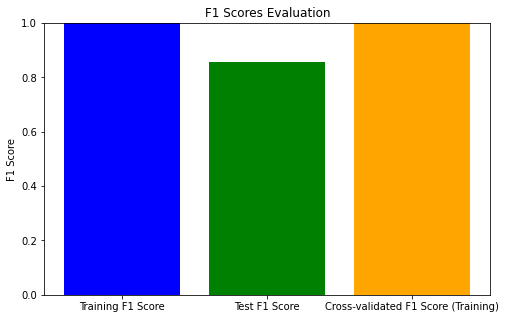

{'Training F1 Score': 0.999766329896959,
 'Test F1 Score': 0.8551236749116607,
 'Cross-validated F1 Score (Training)': 0.9995950010536099}

In [47]:
evaluate_model(knn,X_resampled,y_resampled,X_test,y_test,cv=5)

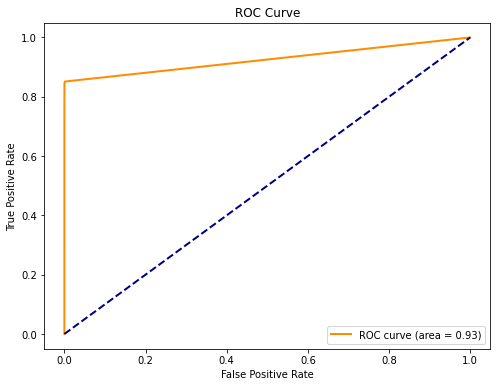

AUC-ROC Score: 0.9255517021212548


In [48]:
Auc_Roc(knn)

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dt = DecisionTreeClassifier()

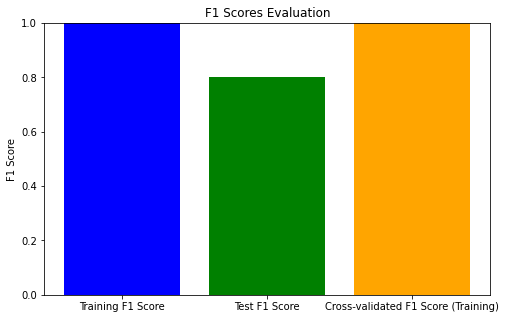

{'Training F1 Score': 1.0,
 'Test F1 Score': 0.8013245033112583,
 'Cross-validated F1 Score (Training)': 0.9993660252730725}

In [118]:
evaluate_model(dt,X_resampled,y_resampled,X_test,y_test,cv=5)

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dtree = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_original, y_train_original)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_f1_score = f1_score(y_test, y_pred)

print("Test F1 Score with Best Hyperparameters:", test_f1_score)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test F1 Score with Best Hyperparameters: 0.8417266187050358


#### DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,random_state=42)

In [124]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,random_state=42)

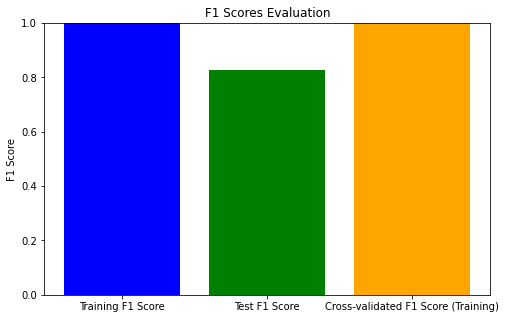

{'Training F1 Score': 0.9997437391968484,
 'Test F1 Score': 0.8275862068965518,
 'Cross-validated F1 Score (Training)': 0.9994514652801255}

In [125]:
evaluate_model(dt,X_resampled,y_resampled,X_test,y_test,cv=5)

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf = RandomForestClassifier()

In [ ]:
evaluate_model(rf,X_resampled,y_resampled,X_test,y_test,cv=5)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probabilities = dt.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score:", roc_auc)


### 3. BorderlineSMOTE Over Sampling

In [76]:
from imblearn.over_sampling import BorderlineSMOTE

In [77]:
borderSMOTE = BorderlineSMOTE()
X_resampled, y_resampled = borderSMOTE.fit_resample(X_train_original, y_train_original)

In [78]:
y_resampled.value_counts()

Class
0    199020
1    199020
Name: count, dtype: int64

Training F1 Score: 0.9932
Test F1 Score: 0.2683
Cross-validated F1 Score (Training): 0.9931


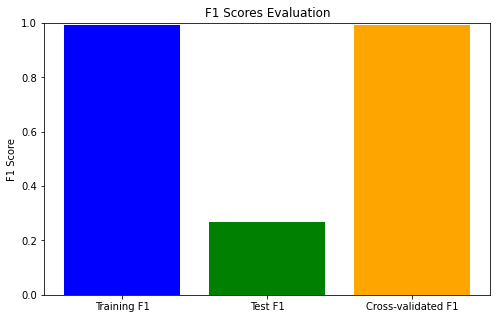

In [79]:
evaluate_model(logr,X_resampled,y_resampled,X_test,y_test,cv=5)

### 4. SVM-SMOTE Over Sampling

In [85]:
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE()
X_resampled, y_resampled = svmsmote.fit_resample(X_train_original, y_train_original)
y_resampled.value_counts()

Class
0    199020
1    199020
Name: count, dtype: int64

Training F1 Score: 0.9949
Test F1 Score: 0.3592
Cross-validated F1 Score (Training): 0.9936


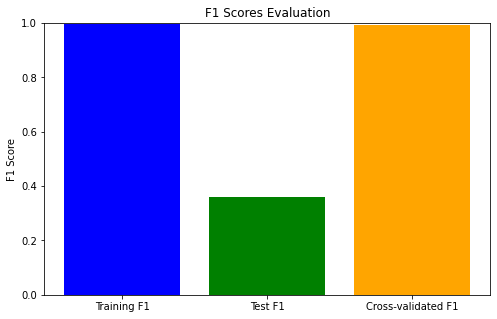

In [86]:
evaluate_model(logr,X_resampled,y_resampled,X_test,y_test,cv=5)

## Hybrid Techniques

### 1. SMOTE-ENN (Synthetic Minority Over-sampling Technique + Edited Nearest Neighbors)

In [49]:
from imblearn.combine import SMOTEENN

In [51]:
smoteenn = SMOTEENN()
X_resampled, y_resampled = smoteenn.fit_resample(X_train_original, y_train_original)

In [52]:
y_resampled.value_counts()

Class
1    199020
0    198706
Name: count, dtype: int64

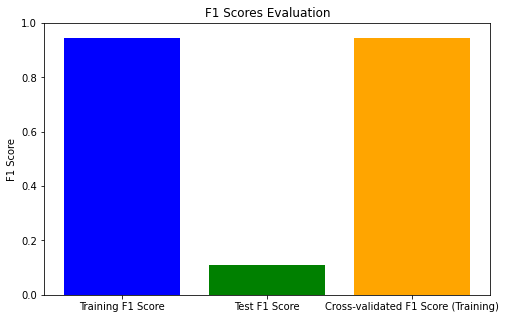

{'Training F1 Score': 0.9441631454002866,
 'Test F1 Score': 0.10836653386454183,
 'Cross-validated F1 Score (Training)': 0.9441526969723346}

In [53]:
evaluate_model(logr,X_resampled,y_resampled,X_test,y_test,cv=5)

### 2.SMOTE-Tomek (Synthetic Minority Over-sampling Technique + Tomek Links)

In [54]:
from imblearn.combine import SMOTETomek

In [55]:
smotetomek = SMOTETomek()
X_resampled, y_resampled = smotetomek.fit_resample(X_train_original, y_train_original)

In [56]:
y_resampled.value_counts()

Class
0    199020
1    199020
Name: count, dtype: int64

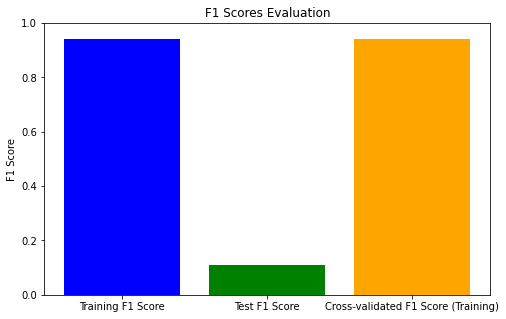

{'Training F1 Score': 0.9428738626300498,
 'Test F1 Score': 0.1098989898989899,
 'Cross-validated F1 Score (Training)': 0.942818917979747}

In [57]:
evaluate_model(logr,X_resampled,y_resampled,X_test,y_test,cv=5)

In [ ]:
evaluate_model(knn,X_resampled,y_resampled,X_test,y_test,cv=5)

## Conclusion
* Under Sampling Techniques:
    * The Under Sampling techniques except for TomekLinks does not work well as number of minority classes are significantly smaller.
    * The model in under sampling techniques overfit on training data and work poorly on test data.
    * The highest score using this technique was achieved by Decision Tree model and TomekLinks with F1 score of 0.78.
    
* Over Sampling techniqes:
    * The Over Sampling techniques except for random over sampler worked well with all the fitted models.
    * KMeans SMOTE Oversampling worked the best and scored f1 score of 0.85 with KNN algorithm. 
    
* Hybrid Sampling Techniques:
